# 4.4 scikit-learn
* 機械学習を含むデータマイニングやデータ解析のライブラリ
* Pythonで深層学習以外の機械学習を実行するツールキットとして、デファクトスタンダードとなっている

## 4.4.1 前処理

### 取り上げる内容
* 欠損値への対応
* カテゴリ変数のエンコーディング
* 特徴量の正規化

### 欠損値への対応
* 欠損値：データの収集において、測定系や通信系の不備により生じる値の欠損
* 欠損値への対処方法は大きくわけて以下の2つがある
  1. 欠損値を除去する
  1. 欠損値を補完する

サンプルのDataFrameを作成 

In [1]:
import numpy as np
import pandas as pd

# サンプルのデータセットを作成
df = pd.DataFrame({
    'A': [1, np.nan, 3, 4, 5],
    'B': [6, 7, 8, np.nan, 10],
    'C': [11, 12, 13, 14, 15]
})

df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


#### 欠損値の除去

#### pandas.DataFrame.isnull()
* DataFrameの各要素が欠損値かどうかをBoolean型で返すDataFrameを取得する

DataFrameの各要素が欠損値かどうかを出力する

In [2]:
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


*欠損値の除去には、DataFrameのdropnaメソッドを使用する*

#### 欠損値の補完

#### sklearn.preprocessing.Imputerクラス
* 欠損値の補完を行うためのクラス

scikit-learnのImputerクラスを使用した欠損値の補完

In [3]:
from sklearn.preprocessing import Imputer
# 平均値で欠損値を補完するためのインスタンスを作成する
imp = Imputer(strategy = 'mean', axis = 0)
# 欠損値を補完
imp.fit(df)
imp.transform(df)

f:\data\study\python\pydataenv\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

#### sklearn.impute.SimpleImputerクラス
* 欠損値の補完を行うためのクラス（ver 0.20以降）

scikit-learnのimpute.SimpleImputerクラスを使用した欠損値の補完

In [4]:
from sklearn.impute import SimpleImputer

# 平均値で欠損値を補完するためのインスタンスを作成する
imp = SimpleImputer(strategy = 'mean')
# 欠損値を補完
imp.fit(df)
imp.transform(df)

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

#### Imputerクラス/SimpleImputerクラスの引数
* strategy引数
  * 値で設定した文字列を欠損値を補完する方法として設定する
  * mean：平均値
  * median：中央値
  * most_frequent：最頻値
* axis（Imputerクラスのみ）
  * 値で指定した数値を欠損値を補完する値を計算する時に使用する軸として設定する
  * 0：列
  * 1：行

### カテゴリ変数のエンコーディング
* カテゴリ変数
  * いくつかの限られた値（例：血液型、職業など）において、どれに該当しているのかを示す変数

DataFrameを作成する

In [5]:
import pandas as pd

df = pd.DataFrame({
    'A':[1, 2, 3, 4, 5],
    'B':['a', 'b', 'a', 'b', 'c']
})
df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


**列B：a,b,cの値のいずれかの値をとる→カテゴリ変数**

カテゴリ変数をコンピュータが処理しやすいように変更する方法
1. [カテゴリ変数のエンコーディング](#カテゴリ変数のエンコーディング)
1. [One-hotエンコーディング](#One-hotエンコーディング)

#### カテゴリ変数のエンコーディング
* カテゴリ変数を数値（整数）に変換する
  * 例：a → 0, b → 1, c → 2

#### sklearn.preprocessing.LabelEncoderクラス
* カテゴリ変数のエンコーディングを行うためのクラス
* classes_変数
  * ラベルエンコーダで変更された元の値を格納

scikit-learnのLabelEncoderクラスを使用して、カテゴリ変数のエンコーディグを行う

In [6]:
from sklearn.preprocessing import LabelEncoder
# ラベルエンコーダのインスタンスを生成
le = LabelEncoder()

# ラベルのエンコーディング
le.fit(df['B'])
le.transform(df['B'])

array([0, 1, 0, 1, 2])

元の値を確認する

In [7]:
# 元の値を確認
le.classes_

array(['a', 'b', 'c'], dtype=object)

#### One-hotエンコーディング
* カテゴリ変数に対して行う符号化の処理
* テーブル形式のデータのカテゴリ変数の列について、以下の処理を行う
  * 取りうる値の分だけ列を増やす
  * 各行の該当する値の列にのみ1が、それ以外の列には0が再入されるように変換
* ダミー変数化とも呼ぶ
  * 生成された列の変数：ダミー変数

#### sklearn.presrocessing.OneHotEncoderクラス
* scikit-learnでOne-hotエンコーディングを行うためのクラス

OneHotEncoderクラスを使用して、One-hotエンコーディングを行う

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# DataFrameをコピー
df_ohe = df.copy()

# ラベルエンコーダのインスタンス化
le = LabelEncoder()
# 英語のa,b,cを1,2,3に変換
df_ohe['B'] = le.fit_transform(df_ohe['B'])

# One-hotエンコーダのインスタンス化
ohe = OneHotEncoder(categorical_features = [1])
# One-hotエンコーディング
ohe.fit_transform(df_ohe).toarray()

f:\data\study\python\pydataenv\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
f:\data\study\python\pydataenv\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1., 0., 0., 1.],
       [0., 1., 0., 2.],
       [1., 0., 0., 3.],
       [0., 1., 0., 4.],
       [0., 0., 1., 5.]])

0.22以降ではwarningが出るので修正版

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer

# DataFrameをコピー
df_ohe = df.copy()
print(df_ohe)

# ColumnTransformerのインスタンス化
ct = ColumnTransformer([('B_x', CountVectorizer(analyzer=lambda x: [x]), 'B')],
    remainder = 'passthrough')
ct.fit_transform(df_ohe)

   A  B
0  1  a
1  2  b
2  3  a
3  4  b
4  5  c


array([[1, 0, 0, 1],
       [0, 1, 0, 2],
       [1, 0, 0, 3],
       [0, 1, 0, 4],
       [0, 0, 1, 5]], dtype=int64)

### 特徴量の正規化
* 特徴量の正規化とは
  * 特徴量の大きさを揃える処理

#### 分散正規化
* 分散正規化とは
  * 特徴量の平均が0、標準偏差が1となるように特徴量を変換する処理
  * 標準化やz変換と呼ばれることもある

分散正規化で使用するDataFrameを作成する

In [10]:
import pandas as pd

# DataFrameを作成する
df = pd.DataFrame(
    {
        'A': [1, 2, 3, 4, 5],
        'B': [100, 200, 400, 500, 800]
    }
)

df

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


#### sklearn.preprocessing.StandardScalerクラス
* scikit-learnで分散正規化を行うためのクラス

#### sklearn.preprocessing.StandardScaler.fitメソッド
* 各列の平均と標準偏差を求める

#### sklean.preprocessing.StandardScaler.transformメソッド
* 分散正規化を実行した結果のNumpy配列を取得する

scikit-learnで分散正規化を行う

In [11]:
from sklearn.preprocessing import StandardScaler

# 分散正規化のインスタンスを生成
stdsc = StandardScaler()

# 分散正規化を実行
stdsc.fit(df)
stdsc.transform(df)

f:\data\study\python\pydataenv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
f:\data\study\python\pydataenv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


array([[-1.41421356, -1.22474487],
       [-0.70710678, -0.81649658],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.40824829],
       [ 1.41421356,  1.63299316]])

#### 最小最大正規化
* 最小最大正規化とは
  * 特徴量の最小値が0、最大値が1をとるように特徴量を正規化する処理

#### sklearn.preprocessing.MinMaxScalerクラス
* 最小最大正規化を行うためのクラス

#### sklearn.preprocessing.MinMaxScaler.fitメソッド
* 各列の最小値と最大値を求める

#### sklearn.preprocessing.MinMaxScaler.transformメソッド
* 最小最大正規化を実行した結果を取得する

scikit-learnで最小最大正規化を行う

In [12]:
from sklearn.preprocessing import MinMaxScaler

# 最小最大正規化のインスタンスを生成
mmsc = MinMaxScaler()

# 最小最大正規化を実行
mmsc.fit(df)
mmsc.transform(df)

f:\data\study\python\pydataenv\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.        , 0.        ],
       [0.25      , 0.14285714],
       [0.5       , 0.42857143],
       [0.75      , 0.57142857],
       [1.        , 1.        ]])

## 4.4.2 分類
* 分類とは
  * データの「クラス」を予測して分けるタスク
  * 例：ユーザのサービスの利用履歴を元に、「退会する（可能性が高い）」、「退会しない（可能性が高い）」の2つのクラスに分類する
* 教師あり学習の典型的なタスク

### 分類モデル構築の流れ
1. 手元のデータセットを学習用とテスト用に分割する
  * 学習用：学習データセット
  * テスト用：テストデータセット
1. 学習データセットを用いて分類モデルを構築する（=「学習」）
1. 構築したモデルのテストデータセットに対する予測を行い、未知のデータに対する対応能力（=「汎化能力」）を評価する

#### 交差検証
* データセットに関して、学習データセットとテストデータセットの分割を繰り返し、モデルの構築と評価を複数回行う方法

#### scikit-learnの学習と予測
* 学習：fitメソッド
* 予測：predictメソッド

#### 学習データセットとテストデータセットの準備

In [13]:
from sklearn.datasets import load_iris

# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target

# 先頭五行を表示
print('X:')
print(X[:5, :])
print('y:')
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


#### sklearn.model_selection.train_test_split関数
* 引数で渡したDataFrameを学習用とテスト用に分割する
 * 第1引数：説明変数（特徴量）を表すNumPy配列/pandasのDataFrame
 * 第2引数：目的変数を表すNumPy配列
 * test_size引数：テストデータの割合
 * random_state引数：データを分割する際に用いるシード値を固定するための整数

Irisデータセットを学習データセットとテストデータセットに分割する

In [14]:
from sklearn.model_selection import train_test_split

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### サポートベクタマシン
* サポートベクタマシンとは
  * 分類・回帰だけでなく、外れ値検出にも使えるアルゴリズム
  * 分類に使う場合
   * 直線や平面などで分離できない（線形分離出来ない）データを高次元の空間に写して線形分離することにより、分類を行うアルゴリズム
   * 実際は、データ間の近さを定量化するカーネル（高次元の空間でのデータ間の内積を計算する関数に相当する）を導入して計算している
* 極端に絶対値の大きな特徴量に分類結果が影響を受けやすい傾向があるので、正規化を行い、それぞれの特徴量の尺度を揃えておくと良い

一様乱数による2つのクラスに属する2次元のデータの生成

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# X軸Y軸共に0から1までの一様分布から100点をサンプリング
X0 = np.random.uniform(size = (100, 2))
# クラス0のラベルを100個生成
y0 = np.repeat(0, 100)

# X軸Y軸ともに-1から0までの一様分布から100点をサンプリング
X1 = np.random.uniform(-1.0, 0.0, size = (100, 2))
# クラス1のラベルを100個生成
y1 = np.repeat(1, 100)

# 散布図にプロット
fig, ax = plt.subplots()
ax.scatter(X0[:, 0], X0[:, 1], marker = 'o', label = 'class 0')
ax.scatter(X1[:, 0], X1[:, 1], marker = 'x', label = 'class 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

**サポートベクタマシンを使用した学習および、決定境界、マージン、サポートベクタを可視化する関数を定義**

#### sklearn.svm.SVCクラス
* サポートベクタマシンによる学習を行うためのクラス
* C引数
  * どれだけマージンを広く/小さく設定するか
  * 値が小さいほどマージンが広くなり、値が大きいほどマージンが狭くなる

In [16]:
from sklearn.svm import SVC
# 学習、及び決定境界、マージン、サポートベクタを可視化する関数
def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin = -1, xmax = 1, ymin = -1, ymax = 1):
    # サポートベクタマシンのインスタンス化
    gamma = 'auto' if (kernel == 'linear') else 'scale'
    svc = SVC(kernel = kernel, C = C, gamma = gamma)
    # 学習
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))
    
    fig, ax = plt.subplots()
    ax.scatter(X0[:, 0], X0[:, 1], marker = 'o', label = 'class 0')
    ax.scatter(X1[:, 0], X1[:, 1], marker = 'x', label = 'class 1')
    # 決定境界とマージンをプロット
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    # サポートベクタをプロット
    ax.scatter(svc.support_vectors_[:, 0],
              svc.support_vectors_[:, 1],
              s = 250, facecolors = 'none',
              edgecolors = 'black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc = 'best')
    plt.show()

**定義した関数を用いて、実際にサポートベクタマシンを使用した学習と、決定境界・マージン・サポートベクタを可視化する**

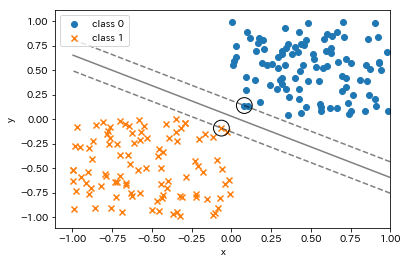

In [17]:
# 決定境界、マージン、サポートベクタをプロット
plot_boundary_margin_sv(X0, y0, X1, y1, kernel = 'linear', C = 1e6)

**サポートベクタマシンのマージンを広くする（決定境界の可視化(C = 0.1)）**

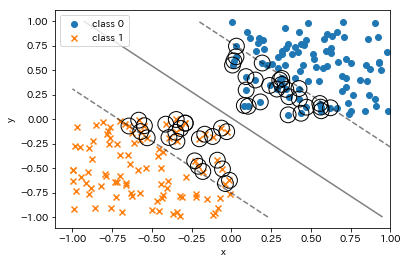

In [18]:
# 決定境界、マージン、サポートベクタをプロット
plot_boundary_margin_sv(X0, y0, X1, y1, kernel = 'linear', C = 0.1)

直線で分離できないデータ

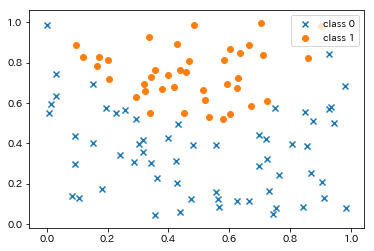

In [19]:
np.random.seed(123)
X = np.random.random(size = (100, 2))
y = (X[:, 1] > 2 * (X[:, 0] - 0.5) ** 2 + 0.5).astype(int)
fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1], marker = 'x', label = 'class 0')
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker = 'o', label = 'class 1')
ax.legend()

plt.show()

**カーネルとして動径規定関数を用いて２つのクラスを分離**

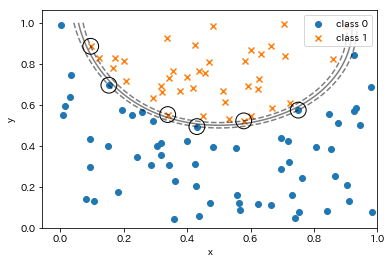

In [20]:
# 決定境界、マージン、サポートベクタを可視化
X0, X1 = X[y == 0, :], X[y == 1, :]
y0, y1 = y[y == 0], y[y == 1]
plot_boundary_margin_sv(X0, y0, X1, y1, kernel = 'rbf', C = 1e3, xmin = 0, ymin = 0)

### 決定木
* 決定木とは
  * データを分割するルールを次々と作成していくことにより、分類を実行するアルゴリズム
  * 機械学習の代表的な方法
  * モデルの内容が理解しやすい
  * 実務でも多用される

#### 木構造
* ノード：頂点
  * 根ノード（root node）：木の最上部に有り、親ノードを持たないノード
  * 葉ノード（leaf node）：木の最下部に有り、子ノードを持たないノード
* エッジ：ノード同士を結ぶ

#### 情報の分割
* 情報利得
  * データを分割することによってどれだけ得をするか
* 決定木における得とは
  * クラスを綺麗に分けられること
    * どれだけクラスが混在しているかという指標が必要：不純度
* 決定木における情報利得
  * 親ノードでの不純度 - 子ノードでの不純度の合計
  * 情報利得が正の場合
    * 親ノードでの不純度 > 子ノードでの不純度の合計
      * 親ノードを子ノードに分割したほうが良い
  * 情報利得が負の場合
    * 親ノードでの不純度 < 子ノードでの不純度の合計
      * 親ノードを子ノードに分割する必要はない

#### 不純度の指標
* ジニ不純度
  * 各ノードに間違ったクラスが振り分けられてしまう確率
  * scikit-learnではデフォルトの不純度として用いられる
* エントロピー
* 分類誤差

#### sklearn.tree.DecisionTreeClassdierクラス
* scikit-learnで決定木を使用するためのクラス

scikit-learnの決定木を用いた学習

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target
# 学習データセットとテストデータセットに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
# 決定木をインスタンス化する（木の最大の深さ = 3）
tree = DecisionTreeClassifier(max_depth = 3)
# 学習
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

決定木の描画

In [22]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

# dot形式のデータを抽出
dot_data = export_graphviz(
    tree,
    filled = True,
    rounded = True,
    class_names =[
        'Setosa',
        'Versicolor',
        'Virginica'
    ],
    feature_names = [
        'Sepal Length',
        'Sepal Width',
        'Petal Length',
        'Petal Width'
    ],
    out_file = None
)

# 決定僕のプロットを出力
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

学習済みの決定木を用いた予測を行う

In [23]:
# 予測
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

### ランダムフォレスト
* ランダムフォレストとは
  * データのサンプル特徴量（説明変数）をランダムに選択して決定木を構築する処理を複数繰り返し、各木の推定結果の多数決や平均値により、分類・回帰を行う手法
  * 決定木のアンサンブル（集合）となる
  * ブートストラップデータ
    * ランダムに選択されたサンプルと特徴量（説明変数）のデータ
* アンサンブル学習
  * 複数の学習器を用いた学習方法
  * ランダムフォレストはアンサンブル学習の一種

#### sklearn.ensamble.RandomForestClassifierクラス
* scikit-learnでランダムフォレストを実行するためのクラス
* n_estimators引数
  * 値に整数を渡すと、決定木の個数となる

scikit-learnでランダムフォレストを用いた学習と予測を行う

In [24]:
from sklearn.ensemble import RandomForestClassifier

# ランダムフォレストをインスタンス化する
forest = RandomForestClassifier(n_estimators = 100, random_state = 123)

# 学習
forest.fit(X_train, y_train)

# 予測
y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

## 4.4.3 回帰
* 回帰とは
  * ある値（目的変数）を別の単一または複数の値（説明変数、機械学習では特に特徴量と呼ぶ）で説明するタスク
* 回帰の例
  * 生徒の数学の試験の点数を、理科の試験の点数で説明する
    * 目的変数：数学の試験の点数
    * 説明変数：理科の試験の点数
  * 賃貸住宅の家賃を、物件の広さと居住地域で説明する
    * 目的変数：家賃
    * 説明変数：物件の広さ、居住地域

#### 線形回帰
* 目的変数をy、説明変数がp個あるとして、x1…xpとした時、「y = a0+a1x1+...+apxp」の数式でデータをもっともよく説明する係数「a0, a1, ... ap」を求める
  * 単回帰
    * 説明変数が1変数
  * 重回帰
    * 説明変数が2変数以上

#### skkearn.linear_model.LinearRegressionクラス
* scikit-learnで線形回帰を行うためのクラス

scikit-learnで線形回帰を実行する

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Bostonデータセットを読み込む
boston = load_boston()
X, y = boston.data, boston.target
# 学習データセットとテストデータセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 123)

# 線形回帰をインスタンス化
lr = LinearRegression()

# 学習
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

データセットの予測

In [26]:
y_pred = lr.predict(X_test)

実績値と予測値から散布図をプロットする

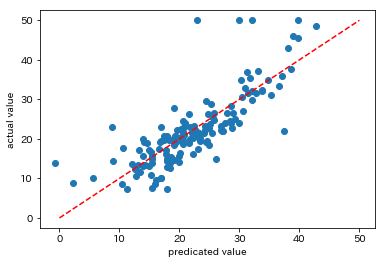

In [27]:
import matplotlib.pyplot as plt

# 横軸を予測値、縦軸を実績値とした散布図をプロットする
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0, 50), (0, 50), linestyle = 'dashed', color = 'red')
ax.set_xlabel('predicated value')
ax.set_ylabel('actual value')

plt.show()

## 4.4.4 次元削減
* 次元削減とは
  * データが持っている情報をなるべく損ねることなく次元を削減してデータを圧縮するタスク

### 主成分分析
* 主成分分析(principal component analysis PCA)とは
  * 高次元のデータに対して分散が大きくなる方向（データが散らばっている方向）を探して、次の次元と同じかそれよりも低い次元にデータを変換する手法

#### sklearn.decomposition.PCAクラス
* scikit-learnで主成分分析を行うためのクラス

50個の2次元データを作成

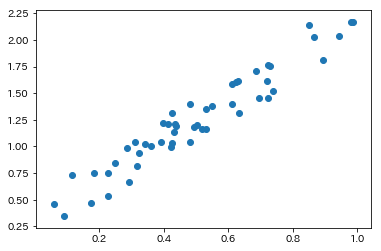

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# シード値を固定
np.random.seed(123)
# 0以上1未満の一様乱数を50個生成
X = np.random.random(size = 50)
# Xを2倍下後に、0以上1未満の一様乱数を0.5倍して足し合わせる
Y = 2 * X + 0.5 * np.random.rand(50)
# 散布図をプロット
fig, ax = plt.subplots()
ax.scatter(X, Y)
plt.show()

主成分分析を実行する

In [29]:
from sklearn.decomposition import PCA

# 主成分のクラスをインスタンス化
pca = PCA(n_components = 2)

# 主成分分析を実行
X_pca = pca.fit_transform(np.hstack((X[:, np.newaxis], Y[:, np.newaxis])))

主成分分析の結果得られた座標を散布図にプロット

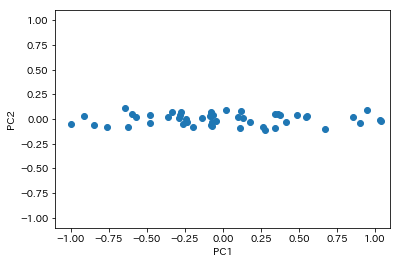

In [30]:
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
plt.show()

## 4.4.5 モデルの評価

### カテゴリの分類精度
* データのカテゴリをどの程度当てられたかを定量化する指標
  * 適合率(precision)
  * 再現率(recall)
  * F値(F-Value)
  * 正解率(accuracy)
  * これらの指標は「混同行列」から計算する
* 混同行列
  * 予測と実績のクラスラベルの組み合わせを集計した表
  * 正例
    * 興味のあるクラスに属するデータ
  * 負例
    * 興味のないクラスに属するデータ
    

<div style="text-align:center; font-weight: bold;">
混同行列
</div>

|　　|　　| 実績 |　　　|
|:---:|:---:|:---:|:---:|
|　　|　　| 正例 | 負例 |
| 予測 | 正例と予測 | tp<br>正例と予測して<br>実際に正例 | fp<br>正例と予測したが<br>実際は負例 |
| 　　 | 負例と予測 | fn<br>負例と予測したが<br>実際は正例 | tn<br>負例と予測して<br>実際に負例 |

#### 混同行列を用いたカテゴリの分類精度の指標の定義
* 適合率
  * 正例と予測したデータの内、実際に正例の割合を表す
  * 適合率 = tp / (tp + fp)
  * 適合率が高い = 正例と予測して実際に正例であったデータの割合が高い
  * 予測するクラスをなるべく間違えないようにしたい時に重視する指標
* 再現率
  * 実際の正例のうち、正例と予測したものの割合を表す
  * 再現率 = tp / (tp + fn)
* F値
  * 適合率と再現率の調和平均
  * F値 = 2 / (1/適合率 + 1/再現率) = 2 * 適合率 * 再現率 / ( 適合率 + 再現率 )
  * *一般的に適合率と再現率の関係はトレードオフの関係にある<br>F値：適合率と再現率がバランスの良い値になることを目指す時に重視する指標*
* 正解率
  * 正例か負例かを問わず、予測と実績が一致したデータの割合を表す
  * 正解率 = (tp + fn) / (tp + fp + fn + tn)

SVM（サポートベクタマシン）での学習と予測

In [31]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data[:100, :], iris.target[:100]
# 学習データセット、テストデータセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
# SVMのインスタンス化
svc = SVC(gamma='scale')
# SVMで学習
svc.fit(X_train, y_train)
# テストデータセットの予測
y_pred = svc.predict(X_test)

#### sklearn.metrics.classification_report関数
* 適合率、再現率、F値を取得する

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### 交差検証（クロスバリデーション）
* データセットを学習用とテスト用に分割する処理を繰り返し、モデルの構築と評価を複数回行う処理
* k分割交差検証
  * k = データの分割数
  * k-1個の集合を学習用データセットとして、1個の集合をテストデータセットとして使用する処理をk回繰り返す
  * 層化k分割交差検証(stractified k-fold cross validation)
    * 目的変数（クラスラベル）のクラスの割合が一定となるk分割交差検証

#### sklearn.model_selection.cross_val_score関数
* scikit-learnで層化k分割交差検証を行う関数
* 第1引数：学習器
* 第2引数：X軸値
* 第3引数：Y軸値
* cv引数：分割数
* scoring引数：評価指標
  * precision：適合率
  * recall：再現率
  * f1-score：F値
  * accuracy：正解率
  

scikit-learnで10分割の交差検証を実行する

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
# サポートベクタマシンをインスタンス化
svc = SVC(gamma = 'scale')
# 10分割の交差検証を実行
cross_val_score(svc, X, y, cv = 10, scoring = 'precision')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### 予測確率の正確さ
* 各データが正例に属する確率を算出し、確率の大きい順にデータを並べた時にその順序がどの程度正確であるかを定量化する

#### データに対する予測確率の正確さを定量化する指標
* ROC曲線(Receiver Operating Characteristic)
  * 基本的な考え方
    1. 確率の高い順にデータを並べた時に、各データの確率以上のデータがすべて正例であると予測する
    1. その時に実際に正例であったデータが全体の正例に占める割合（真陽性率）、<br>実際は負例にもかかわらず正例と予測されたデータが全体の負例に占める割合（偽陽性率）を計算
    1. データを順にたどっていき、正例と予測する確率のしきい値を変えていた時に真陽性率と偽陽性率を求め、<br>それぞれ横軸、縦軸にプロットして曲線を描く
* AUC(Area Under the Curve)
 * ROC曲線の下部の図形について、横軸方向を幅、縦軸方向を長さとした長方形の集まり
 * 1に近づくほど、確率が相対的に高いサンプルが正例、相対的に低いサンプルが負例となる傾向が高まる
   * この時、確率の大きさに依って正例と負例を区別できる
 * 0.5に近づくほど、確率の大きさに依って正例と負例を区別出来ず、正例と負例がランダムに混じっっていることになる
 * AUCを用いることにより、モデル間の「良さ」を比較することが可能になる

ROC曲線を描画する

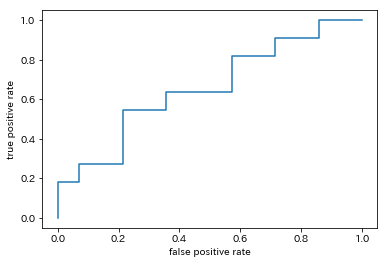

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 偽陽性率と真陽性率を算出
fpr = np.array([0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 4, 5, 5, 6, 7, 8, 8, 8, 9, 10, 10, 11, 12, 12, 13, 14]) / 14
tpr = np.array([0, 1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 7, 7, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11]) / 11
# ROC曲線をプロット
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

#### sklearn.metrics.roc_curve関数
* ROC曲線の元になる真陽性率、偽陽性率、しきい値を取得する

scikit-learnで真陽性率、偽陽性率を取得する

In [35]:
from sklearn.metrics import roc_curve

# 各ユーザが退会したかどうかを表すラベル
labels = np.array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])
# 各ユーザの予測退会確率
probs = np.array([0.98, 0.95, 0.9, 0.87, 0.85,
                 0.8, 0.75, 0.71, 0.63, 0.55,
                 0.51, 0.47, 0.43, 0.38, 0.35,
                 0.31, 0.28, 0.24, 0.22, 0.19,
                 0.15, 0.12, 0.08, 0.04, 0.01])
# 偽陽性率、真陽性率、しきい値を算出
fpr, tpr, threshold = roc_curve(labels, probs)
print('偽陽性率：', fpr)
print('真陽性率：', tpr)

偽陽性率： [0.         0.         0.         0.07142857 0.07142857 0.21428571
 0.21428571 0.35714286 0.35714286 0.57142857 0.57142857 0.71428571
 0.71428571 0.85714286 0.85714286 1.        ]
真陽性率： [0.         0.09090909 0.18181818 0.18181818 0.27272727 0.27272727
 0.54545455 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182
 0.90909091 0.90909091 1.         1.        ]


算出した偽陽性率、真陽性率からROC曲線をプロットする

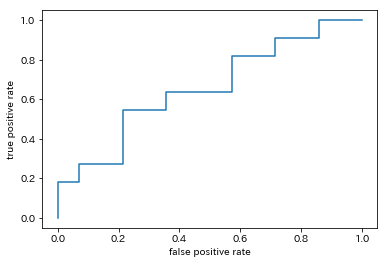

In [36]:
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')

plt.show()

#### sklearn.metrics.roc_auc_score関数
* scikit-learnでAUCを取得する関数

scikit-learnでAUCを取得する

In [37]:
from sklearn.metrics import roc_auc_score
# AUCを算出
roc_auc_score(labels, probs)

0.6558441558441558

## 4.4.6 ハイパーパラメータの最適化

#### ハイパーパラメータ
* 機械学習のアルゴリズムのパラメータ
* 学習の時に値が決定されず、学習とは別にユーザーが値を指定する必要がある
  * 例：決定木における木の深さ、ランダムフォレストに含まれる決定木の個数など

#### ハイパーパラメータの最適化
* グリッドサーチ(grid search)
  * ハイパーパラメータの候補を指定して、それぞれのハイパーパラメータで学習を行いテストデータに対する予測が最も良い値を選択する
  * 交差検証と組あせて、頻繁に使用される
* ランダムサーチ(random search)

#### sklearn.model_selection.GridSearchCV
* scilit-learnでクリッドサーチを行うためのクラス
* 第1引数：学習器
* param_grid引数：引数名と値のリストを対応付ける辞書を指定する
* cv引数：値に整数を渡し、分割数を指定する

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Irisデータセットをロード
iris = load_iris()
X, y = iris.data, iris.target
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
# 決定木をインスタンス化
clf = DecisionTreeClassifier()
param_grid = {'max_depth': [3, 4, 5]}
# 10分割の交差検証を実行
cv = GridSearchCV(clf, param_grid = param_grid, cv = 10)
cv.fit(X_train, y_train)

f:\data\study\python\pydataenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

#### sklearn.model_selection.GridSearchCV.best_params_
* グリッドサーチ実行後、学習に最適なパラメータを保持する

最適な深さを確認する

In [40]:
cv.best_params_

{'max_depth': 3}

#### sklearn.model_selection.GridSearchCV.best_estimator_
* グリッドサーチ実行後、学習に最適なモデルを保持する

最適なモデルを確認する

In [41]:
cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### sklearn.model_selection.GridSearchCV.predictメソッド
* グリッドサーチ実行後、推定された最適なモデルを用いて予測を行う

推定された最適なモデルを用いて予測を行う

In [42]:
y_pred = cv.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

## 4.4.7 クラスタリング

#### クラスタリングとは
* ある基準を設定してデータ間の類似性を計算し、データをクラスタ（グループ）ごとにまとめるタスク
* 「教師なし学習」の典型的なタスク

### k-means
* 以下の手順に従ってデータをクラスタリングする手法
  1. 各データにランダムに割り当てたクラスタのラベルを用いて、各クラスタに属するデータの中心をそのクラスタの中心とする
  1. 各データに対して最も近いクラスタ中心のクラスタをそのデータの新たなラベルとする
  1. 各クラスタに所属するデータの中心を新たなクラスタ中心とする
  1. クラスタ中心が収束するまで2.と3.を繰り返す

In [43]:
from sklearn.datasets import load_iris
# Irisデータセットを読み込む
iris = load_iris()
data = iris.data
# 1,3列目を抽出
X = data[:100, [0, 2]]

生成したデータを散布図にプロット

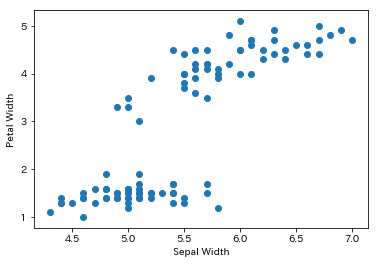

In [44]:
import matplotlib.pyplot as plt
# 散布図を描画
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
plt.show()

#### sklearn.cluster.KMeansクラス
* scikit-learnでk-meansを用いたクラスタリングを行うクラス
* n_clustersパラメータ
  * 値に数値を取り、クラスタ数を指定する
* initパラメータ
  * 値に文字列を取り、初期値の与え方を指定する
    * random：初期値を乱数でランダムに生成
    * k-means++：k-means++法を実行し、初期のクラスタ中心が離れた位置に配置される
* n_initパラメータ
  * 値に数値を取り、k-meansの実行回数を指定する
* max_iterパラメータ
  * 値に数値を取り、k-meansで反復する最大回数を指定する
* tolパラメータ
  * 値にfloatを取り、k-meansの収束を判定する許容誤差を指定する
* random_stateパラメータ
  * 値に数値を取り、乱数のシードを固定するための数値を指定する

#### sklearn.cluster.KMeans.fit_predictメソッド
* 学習と予測を一度に行う

scikit-learnでk-meansによるクラスタリングを実行する

In [46]:
from sklearn.cluster import KMeans
# クラスタ数を３とするKMeansのインスタンスを生成
km = KMeans(n_clusters = 3, init = 'random', n_init = 10, random_state = 123)
# KMeansを実行
y_km = km.fit_predict(X)

k-meansによるクラスタリングの結果を散布図で描画する

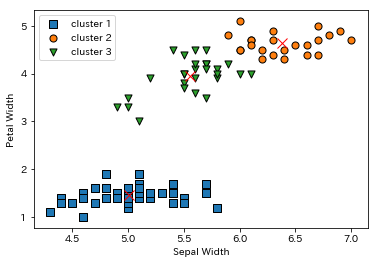

In [48]:
import numpy as np
fig, ax = plt.subplots()
# 散布図（クラスタ１）
ax.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 50, edgecolor = 'black', marker = 's', label = 'cluster 1')
# クラスタ中心（クラスタ１）
ax.plot(np.mean(X[y_km == 0, 0]), np.mean(X[y_km == 0, 1]), marker = 'x', markersize = 10, color = 'red')

# 散布図（クラスタ２）
ax.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 50, edgecolor = 'black', marker = 'o', label = 'cluster 2')
# クラスタ中心（クラスタ２）
ax.plot(np.mean(X[y_km == 1, 0]), np.mean(X[y_km == 1, 1]), marker = 'x', markersize = 10, color = 'red')

# 散布図（クラスタ３）
ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 50, edgecolor = 'black', marker = 'v', label = 'cluster 3')
# クラスタ中心（クラスタ３）
ax.plot(np.mean(X[y_km == 2, 0]), np.mean(X[y_km == 2, 1]), marker = 'x', markersize = 10, color = 'red')

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
ax.legend()

plt.show()

### 階層的クラスタリング
* 階層的クラスタリングは大きく下記に分かれる
  * 凝集型
    - 地味にコツコツとデータを集めていくアプローチ
      1. 似ているデータをまとめて小さなクラスタを作る
      1. 上記で作成したクラスタと似ているデータをさらにまとめる
      1. 最終的に1つのクラスタにまとめられるまで繰り返す
  * 分割型
    - 最初にすべてのデータが1つのクラスタに所属していると考え、順次クラスタを分割していくアプローチ

#### sklearn.cluster.AgglomerativeClusteingクラス
* scikit-learnで凝集型クラスタリングを行うためのクラス
* n_slustersパラメータ
  * 値に数値をとり、クラスタ数を指定する
- affinityパラメータ
  - 値に文字列をとり、データ間の距離の決定方法を指定する
    - euclidean：ユークリッド距離
- linkageパラメータ
  - 値に文字列をとり、クラスタリング方法を指定する
    - complete：最長距離法

scikit-learnで凝集的クラスタリングを実行する

In [49]:
from sklearn.cluster import AgglomerativeClustering

# 凝集型の階層的クラスタリングのインスタンスを生成
ac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
# クラスタリングを実行し、各クラスのクラスタ番号を取得
labels = ac.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0], dtype=int64)

#### scipy.cluster.hierarchy.dendrogram関数
* 樹形図をプロットする

凝集的クラスタリングの実行結果を樹形図にプロットする

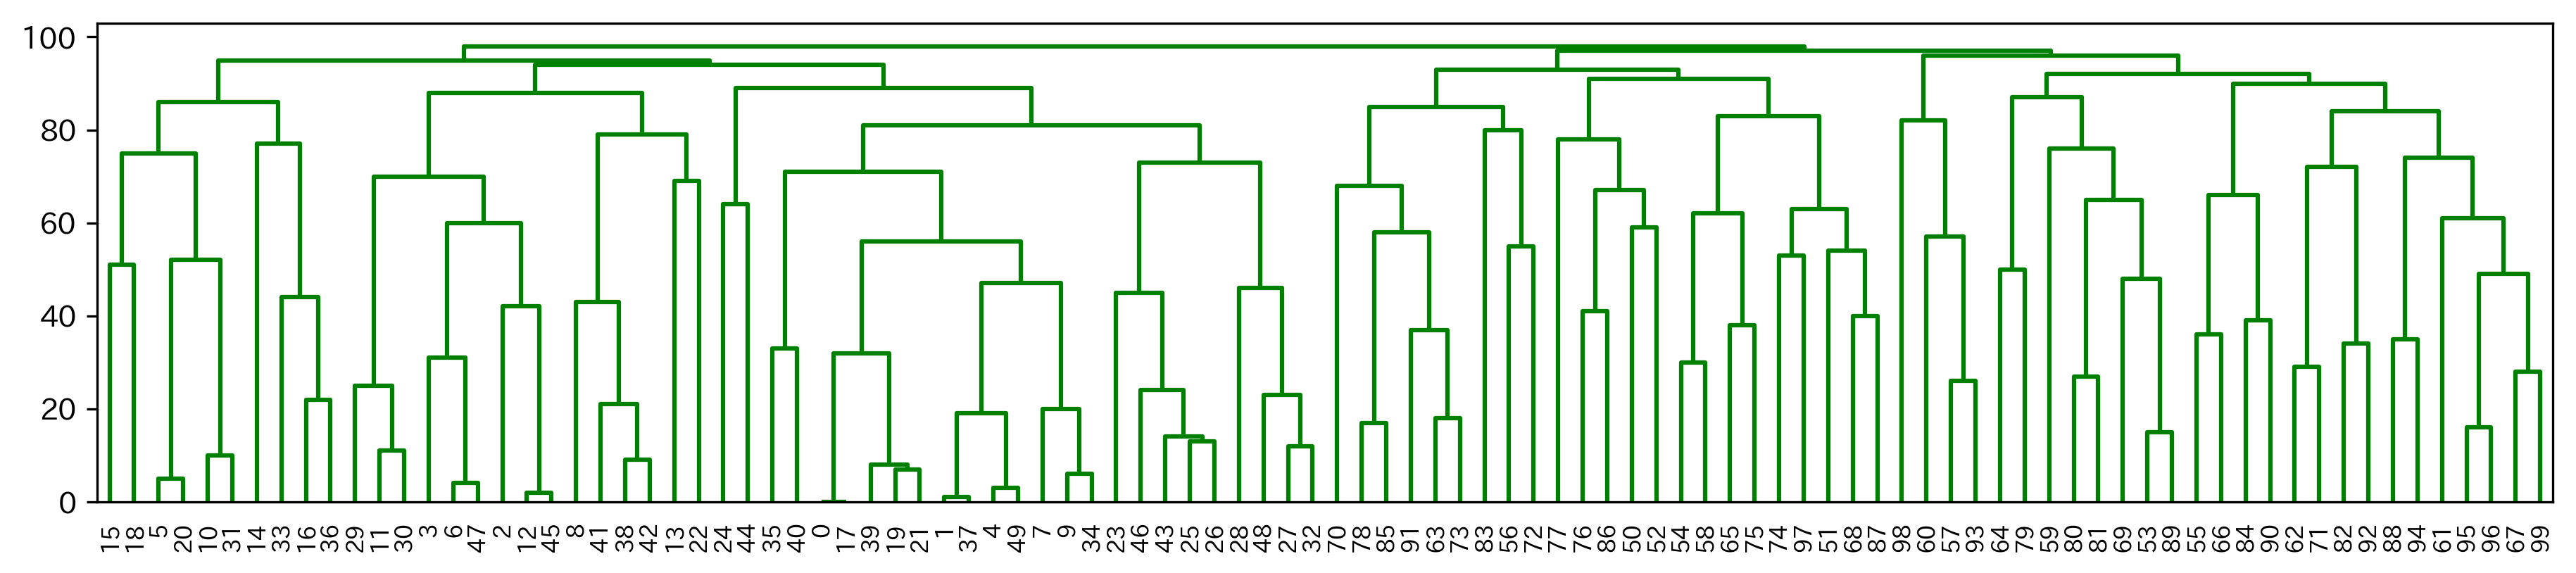

In [53]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

# 子クラスタとの関係を抽出
children = ac.children_
# クラスタ間の距離を抽出
distance = np.arange(children.shape[0])
# 各データの観測番号
no_of_observations = np.arange(2, children.shape[0] + 2)
# 子クラスタ、クラスタ間の距離、観測番号を列方向に結合
linkage_matrix = np.hstack((children, distance[:, np.newaxis], no_of_observations[:, np.newaxis])).astype(float)
# 樹形図をプロット
fig, ax = plt.subplots(figsize = (15, 3), dpi = 300)
dendrogram(linkage_matrix, labels = np.arange(100), leaf_font_size = 8, color_threshold = np.inf)
plt.show()